In [68]:
import pandas as pd

data_dir = "data/processed/"

df_election_totals = pd.read_csv(data_dir + "election_totals.csv")
df_election_totals.set_index("year", inplace=True)

df_registration_voted_totals = pd.read_csv(data_dir + "registration_voted_totals.csv")
df_registration_voted_totals.set_index("year", inplace=True)

df_registration_totals = pd.read_csv(data_dir + "registration_totals.csv")
df_registration_totals.set_index("year", inplace=True)

df_precincts_over_time = pd.read_csv(data_dir + "precincts_over_time.csv")
df_precincts_over_time.drop("Unnamed: 0", axis=1, inplace=True)

<AxesSubplot:title={'center':'Votes By Party'}, xlabel='year'>

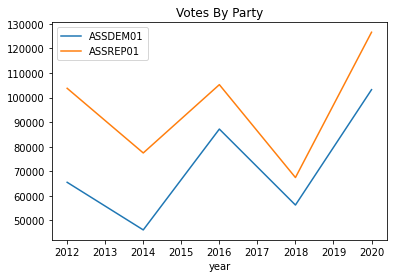

In [57]:
df_election_totals[["ASSDEM01", "ASSREP01"]].plot.line(title = "Votes By Party")

<AxesSubplot:title={'center':'Number of Votes Cast by Registered Party'}, xlabel='year'>

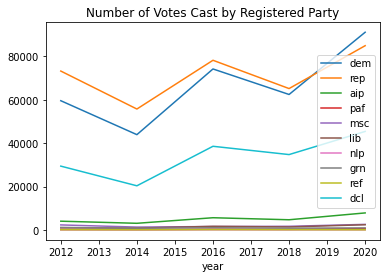

In [58]:
df_registration_voted_totals[["dem","rep","aip","paf","msc","lib","nlp","grn","ref","dcl"]].plot.line(title = "Number of Votes Cast by Registered Party")

<AxesSubplot:title={'center':'Registration Totals by Party'}, xlabel='year'>

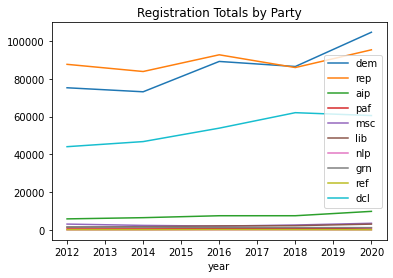

In [42]:
df_registration_totals[["dem","rep","aip","paf","msc","lib","nlp","grn","ref","dcl"]].plot.line(title = "Registration Totals by Party")

<AxesSubplot:xlabel='year'>

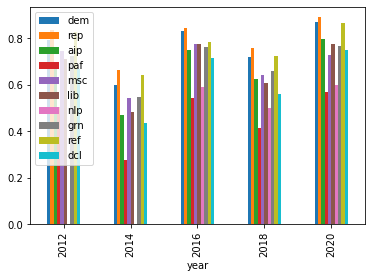

In [59]:
df_perc = df_registration_voted_totals / df_registration_totals
df_perc[["dem","rep","aip","paf","msc","lib","nlp","grn","ref","dcl"]].plot.bar()

## Observing Precinct Level Voting Trends

In [69]:
# Make new columns representing the proprotion of votes cast in assembly race for either candidate.
df_precincts_over_time["ASSDEMPERC"] = df_precincts_over_time["ASSDEM01"] / (df_precincts_over_time["ASSREP01"] + df_precincts_over_time["ASSDEM01"])
df_precincts_over_time["ASSREPPERC"] = df_precincts_over_time["ASSREP01"] / (df_precincts_over_time["ASSREP01"] + df_precincts_over_time["ASSDEM01"])

sr_dem_perc = df_precincts_over_time.groupby("srprec")["ASSDEMPERC"].mean()
print((sr_dem_perc.idxmin(), sr_dem_perc.min()), (sr_dem_perc.idxmax(), sr_dem_perc.max()))


(103, 0.23251942830096445) (215, 0.6447330459605246)


In [73]:
def determine_top_ballot_dem_perc(prec):
    top_race = "GOV" if prec["year"] in ["2014", "2018"] else "PRS"
    return prec["{}DEM01".format(top_race)] / (prec["{}DEM01".format(top_race)] + prec["{}REP01".format(top_race)])

df_precincts_over_time["TOPDEMPERC"] = df_precincts_over_time.apply(determine_top_ballot_dem_perc, axis=1)
df_precincts_over_time["DIFFDEMPERC"] = df_precincts_over_time["TOPDEMPERC"] - df_precincts_over_time["ASSDEMPERC"]

sr_top_dem_perc = df_precincts_over_time.groupby("srprec")["TOPDEMPERC"].mean()

print((sr_top_dem_perc.idxmin(), sr_top_dem_perc.min()), (sr_top_dem_perc.idxmax(), sr_top_dem_perc.max()))

sr_dem_perc_diff = df_precincts_over_time.groupby("srprec")["DIFFDEMPERC"].mean()
sr_dem_perc_diff.max()

(103, 0.291933232058537) (215, 0.7619314256736042)


0.17393687019280776